In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Wage.csv')
data = data.iloc[:,1:]
print(data.shape)
data.head()

(3000, 12)


,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [25]:
#lets get some test_ages 
test_ages = np.linspace(min(data['age']),max(data['age']),200)
print(test_ages)

[18.         18.31155779 18.62311558 18.93467337 19.24623116 19.55778894
 19.86934673 20.18090452 20.49246231 20.8040201  21.11557789 21.42713568
 21.73869347 22.05025126 22.36180905 22.67336683 22.98492462 23.29648241
 23.6080402  23.91959799 24.23115578 24.54271357 24.85427136 25.16582915
 25.47738693 25.78894472 26.10050251 26.4120603  26.72361809 27.03517588
 27.34673367 27.65829146 27.96984925 28.28140704 28.59296482 28.90452261
 29.2160804  29.52763819 29.83919598 30.15075377 30.46231156 30.77386935
 31.08542714 31.39698492 31.70854271 32.0201005  32.33165829 32.64321608
 32.95477387 33.26633166 33.57788945 33.88944724 34.20100503 34.51256281
 34.8241206  35.13567839 35.44723618 35.75879397 36.07035176 36.38190955
 36.69346734 37.00502513 37.31658291 37.6281407  37.93969849 38.25125628
 38.56281407 38.87437186 39.18592965 39.49748744 39.80904523 40.12060302
 40.4321608  40.74371859 41.05527638 41.36683417 41.67839196 41.98994975
 42.30150754 42.61306533 42.92462312 43.2361809  43

# SPLINES

checkout this if you have some time - https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

In [26]:
# For generating splines, we first need to have an appropriate matrix for basis functions 
# in R it is done by bs() functions, in python we will do it by using bs() in dmatrix function from patsy library 
# so, briefly -- Data -> convert into matrix using dmatrix -> fit this with OLS, or GLM (generalised linear model)

patcy.dmatrix - https://patsy.readthedocs.io/en/latest/API-reference.html

In [27]:
# fit a spline with knots at 25, 40 and 60
transformed_x = dmatrix("bs(age , knots = (25,40,60), degree = 3, include_intercept = False)",data = {'age':data['age']},
                                                                                                  return_type = 'dataframe')

# design = dmatrix("bs(age, knots=(25,40,60), degree=3, include_intercept=False)", data={"age":Wages.age}, 
#                  return_type="dataframe")

In [28]:
transformed_x.head() #this looks complex, don't worry, we dont need to get into much details about it.

,Intercept,"bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.559911,0.403778,0.033395,0.000000,0.000000,0.0
2,1.0,0.000000,0.114796,0.618564,0.262733,0.003906,0.0
3,1.0,0.000000,0.167109,0.633167,0.198880,0.000844,0.0
4,1.0,0.000000,0.034014,0.508194,0.426542,0.031250,0.0


In [29]:
# fit a GLM model to the transformded data
fit1 = sm.GLM(data['wage'], transformed_x).fit()

# lets get some predictions and try to plot this cureve
test_dmatrix1 = dmatrix("bs(test_ages , knots = (25,40,60), degree = 3, include_intercept = False)",
                                                                                 data = {'test_ages':test_ages},
                                                                                                  return_type = 'dataframe')
pred1 = fit1.predict(test_dmatrix1)

Text(0.5, 1.0, 'Cubic Spline')

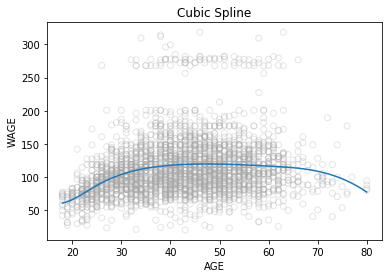

In [30]:
plt.scatter(data['age'],data['wage'],alpha = 0.3,facecolor = 'none', edgecolors='darkgray')
plt.plot(test_ages,pred1)
plt.xlabel('AGE')
plt.ylabel('WAGE')
plt.title('Cubic Spline')

reference for below code - https://github.com/hardikkamboj/Code/blob/master/Confidence_intervals_using_boorstraping/bootstrap.py

In [31]:
#Confidence intervals
# reference - https://github.com/hardikkamboj/Code/blob/master/Confidence_intervals_using_boorstraping/bootstrap.py
def boot(X_data,y_data,R,test_data):
    predictions = []
    for i in range(R):
        predictions.append(alpha(X_data,y_data,get_indices(X_data,len(X_data)),test_data))

    return np.percentile(predictions,2.5,axis = 0),np.percentile(predictions,97.5,axis = 0)

def alpha(X_data,y_data,index,test_data):
    X = X_data.loc[index]
    y = y_data.loc[index]

    model = sm.GLM(y,X).fit(disp = 0) #disp = 0, to not print anything

    return model.predict(pd.DataFrame(test_data))


def get_indices(data,num_samples):
    return  np.random.choice(data.index, num_samples, replace=True)

In [32]:
li,ui = boot(transformed_x,data['wage'],1000,test_dmatrix1)

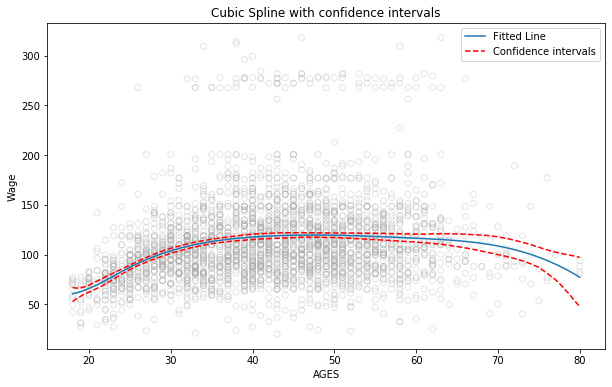

In [33]:
plt.figure(figsize = (10,6))
plt.scatter(data['age'],data['wage'],alpha = 0.3,facecolor = 'none', edgecolors='darkgray')
plt.plot(test_ages,pred1,label = 'Fitted Line')
plt.plot(test_ages,li,linestyle = 'dashed',color = 'r',label = 'Confidence intervals')
plt.plot(test_ages,ui,linestyle = 'dashed',color = 'r')
plt.xlabel('AGES')
plt.ylabel('Wage')
plt.title('Cubic Spline with confidence intervals')
plt.legend()

In [34]:
# in the above example, we hardcoded the values of the knots - [25,40,60], however, we can also use df (degress of freedom),
# and this will choose equally spaced knots

## Natural Splines

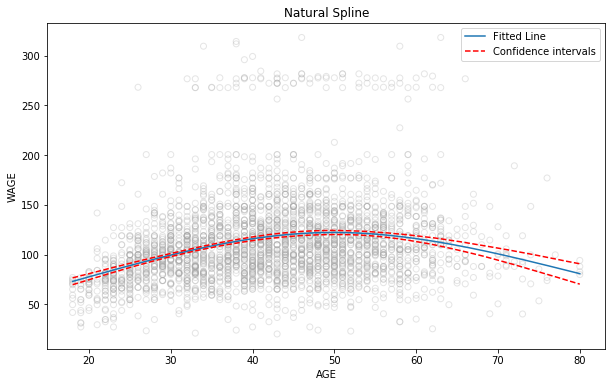

In [35]:
# fit a spline with knots at 25, 40 and 60
transformed_x2 = dmatrix("cr(age,df = 3)", {"age": data['age']}, return_type='dataframe')

# fit a GLM model to the transformded data
fit2 = sm.GLM(data['wage'], transformed_x2).fit()

# lets get some predictions and try to plot this cureve
test_dmatrix2 = dmatrix("cr(test_ages,df = 3)", {"test_ages": test_ages}, return_type='dataframe')
pred2 = fit2.predict(test_dmatrix2)

#confidence intervals 
li,ui = boot(transformed_x2,data['wage'],1000,test_dmatrix2)

plt.figure(figsize = (10,6))
plt.scatter(data['age'],data['wage'],alpha = 0.3,facecolor = 'none', edgecolors='darkgray')
plt.plot(test_ages,pred2,label = 'Fitted Line')
plt.plot(test_ages,li,linestyle = 'dashed',color = 'r',label = 'Confidence intervals')
plt.plot(test_ages,ui,linestyle = 'dashed',color = 'r')
plt.xlabel('AGE')
plt.ylabel('WAGE')
plt.title('Natural Spline')
plt.legend()

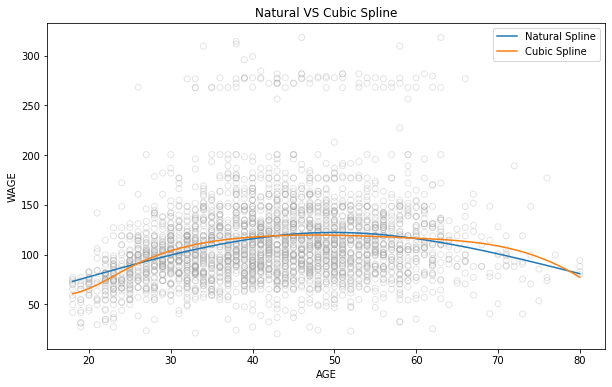

In [36]:
# comparing both of them
plt.figure(figsize = (10,6))
plt.scatter(data['age'],data['wage'],alpha = 0.3,facecolor = 'none', edgecolors='darkgray')
plt.plot(test_ages,pred2,label = 'Natural Spline')
plt.plot(test_ages,pred1,label = 'Cubic Spline')
plt.xlabel('AGE')
plt.ylabel('WAGE')
plt.title('Natural VS Cubic Spline')
plt.legend()

In [37]:
# even from the confidence intervals, we can see how well it is performing,better than cubic spline
# now see as we move to polynomial to natural spline, the confidence interval is getting more narrow. 
# the narrow the confidence interval - better the model